# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date
from scipy.stats import linregress
from scipy import stats



# Import API key
from api_keys import weather_api_key


# Defininig Farenheit as units used in this project
units = "Imperial"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

base_url= "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}"
#query_url

print(len(cities))
cities

634


['puerto ayora',
 'sentyabrskiy',
 'szentgotthard',
 'malangwa',
 'mizdah',
 'payson',
 'carnarvon',
 'ashland',
 'fairbanks',
 'bredasdorp',
 'new norfolk',
 'punta arenas',
 'ilulissat',
 'busselton',
 'deputatskiy',
 'tura',
 'hermanus',
 'hithadhoo',
 'quatre cocos',
 'kawalu',
 'ushuaia',
 'ulladulla',
 'oranjemund',
 'rikitea',
 'hervey bay',
 'te anau',
 'kapaa',
 'hasaki',
 'belmonte',
 'laguna',
 'cabedelo',
 'barrow',
 'avarua',
 'toktogul',
 'vaini',
 'georgetown',
 'esperance',
 'bluff',
 'vostok',
 'liberty',
 'mahebourg',
 'mayo',
 'albany',
 'comodoro rivadavia',
 'vaitupu',
 'mount gambier',
 'asau',
 'omsukchan',
 'provideniya',
 'hobart',
 'port shepstone',
 'jurm',
 'cairns',
 'tyukhtet',
 'amderma',
 'barentsburg',
 'nikolskoye',
 'san-pedro',
 'manbij',
 'khatanga',
 'yellowknife',
 'komsomolskiy',
 'ust-nera',
 'kondinskoye',
 'cape town',
 'olafsvik',
 'verkhnevilyuysk',
 'sitka',
 'kyshtovka',
 'zelenets',
 'saldanha',
 'vila',
 'upernavik',
 'attawapiskat',
 'k

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_data = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []



print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(f"{query_url}&q={city}").json()
        city_name_data.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_print=(response["name"])
        print(f"Processing Record | {city_print}")
    except:
        print("No results, skipping.....")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record | Puerto Ayora
No results, skipping.....
Processing Record | Szentgotthárd
Processing Record | Malaṅgawā
Processing Record | Mizdah
Processing Record | Payson
Processing Record | Carnarvon
Processing Record | Ashland
Processing Record | Fairbanks
Processing Record | Bredasdorp
Processing Record | New Norfolk
Processing Record | Punta Arenas
Processing Record | Ilulissat
Processing Record | Busselton
Processing Record | Deputatsky
Processing Record | Tura
Processing Record | Hermanus
Processing Record | Hithadhoo
Processing Record | Quatre Cocos
Processing Record | Kawalu
Processing Record | Ushuaia
Processing Record | Ulladulla
Processing Record | Oranjemund
Processing Record | Rikitea
Processing Record | Hervey Bay
Processing Record | Te Anau
Processing Record | Kapaa
Processing Record | Hasaki
Processing Record | Belmonte
Processing Record | Laguna
Processing Record | Cabedelo
Processing Record | Barrow
Processi

No results, skipping.....
Processing Record | Lonār
Processing Record | Nieuw Amsterdam
Processing Record | Saint-Philippe
Processing Record | Ancud
Processing Record | Yar-Sale
Processing Record | Marsh Harbour
Processing Record | Laas
Processing Record | Guarapari
Processing Record | At-Bashi
Processing Record | Sur
No results, skipping.....
Processing Record | Cidreira
Processing Record | Utete
Processing Record | Narsaq
Processing Record | Waipawa
Processing Record | Ghanzi
Processing Record | Zyryanka
Processing Record | Hearst
Processing Record | Carrollton
Processing Record | Pangkalanbuun
Processing Record | Souillac
Processing Record | Bilma
Processing Record | Balikpapan
Processing Record | Cássia
Processing Record | Moose Factory
Processing Record | Daru
Processing Record | Luckenwalde
Processing Record | Suzun
Processing Record | Tuatapere
Processing Record | Raudeberg
Processing Record | Klaksvík
Processing Record | Amlapura
Processing Record | Tanabe
Processing Record | L

Processing Record | Roboré
Processing Record | Fort Nelson
Processing Record | Yerbogachën
Processing Record | Yārāda
Processing Record | Coyhaique
Processing Record | Richards Bay
Processing Record | Galle
Processing Record | Bahía Solano
Processing Record | Rudnogorsk
Processing Record | Ostrovnoy
Processing Record | Merzifon
Processing Record | Ionia
Processing Record | Linhares
Processing Record | Vila Nova de Milfontes
Processing Record | Kajaani
Processing Record | Fuerte Olimpo
Processing Record | Coahuayana Viejo
Processing Record | Sarh
Processing Record | Erenhot
No results, skipping.....
Processing Record | São João da Barra
Processing Record | Quemado de Güines
Processing Record | Bud
Processing Record | Makakilo City
Processing Record | Tadine
Processing Record | Batagay
Processing Record | Villamontes
Processing Record | Vestmanna
Processing Record | Xiaoshi
Processing Record | Balkhash
Processing Record | Agua Verde
No results, skipping.....
Processing Record | Tautira
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:



weather_dictionary_list = ({"City":city_name_data, 
                               "Lat": lat_list,
                               "Lng": lng_list,
                               "Max Temp": max_temp,
                               "Humidity": humidity,
                               "Cloudiness":cloudiness,
                               "Wind Speed": wind_speed,
                               "Country": country,
                               "Date":date})

weather_life_df = pd.DataFrame(weather_dictionary_list)


weather_life_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,68.00,96,79,5.99,EC,1595556616
1,Szentgotthárd,46.95,16.27,63.00,71,74,1.99,HU,1595556747
2,Malaṅgawā,26.86,85.56,83.41,75,78,10.60,NP,1595556614
3,Mizdah,31.45,12.98,62.35,81,0,3.09,LY,1595556747
4,Payson,40.04,-111.73,77.00,33,75,13.87,US,1595556747
...,...,...,...,...,...,...,...,...,...
586,Voi,-3.39,38.56,62.51,84,14,5.88,KE,1595556814
587,Bambanglipuro,-7.95,110.28,80.56,67,98,12.97,ID,1595556814
588,Saint-Raphaël,19.43,-72.20,73.92,84,84,4.09,HT,1595556814
589,Jumla,29.27,82.18,66.00,62,68,0.65,NP,1595556814


In [5]:
# Exporting the dataframe above to CSV, located in the output_data directory

weather_life_df.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
over_100_humidity = weather_life_df.loc[weather_life_df["Humidity"]>90]
over_100_humidity.reset_index(inplace=True)
over_100_humidity



,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Puerto Ayora,-0.74,-90.35,68.00,96,79,5.99,EC,1595556616
1,8,Bredasdorp,-34.53,20.04,51.80,93,0,5.82,ZA,1595556609
2,14,Tura,25.52,90.22,75.94,96,98,5.08,IN,1595556697
3,23,Hervey Bay,-25.30,152.85,64.00,95,71,5.99,AU,1595556749
4,27,Belmonte,-15.86,-38.88,69.80,94,90,3.36,BR,1595556749
...,...,...,...,...,...,...,...,...,...,...
85,550,Vestmanna,62.16,-7.17,50.00,100,100,11.41,FO,1595556810
86,555,Mangalore,12.87,74.88,75.20,100,90,6.93,IN,1595556810
87,560,Arteaga,18.47,-102.42,66.49,99,100,2.44,MX,1595556811
88,562,Benjamin Constant,-4.38,-70.03,75.20,100,97,0.65,BR,1595556811


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = over_100_humidity
clean_city_data

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Puerto Ayora,-0.74,-90.35,68.00,96,79,5.99,EC,1595556616
1,8,Bredasdorp,-34.53,20.04,51.80,93,0,5.82,ZA,1595556609
2,14,Tura,25.52,90.22,75.94,96,98,5.08,IN,1595556697
3,23,Hervey Bay,-25.30,152.85,64.00,95,71,5.99,AU,1595556749
4,27,Belmonte,-15.86,-38.88,69.80,94,90,3.36,BR,1595556749
...,...,...,...,...,...,...,...,...,...,...
85,550,Vestmanna,62.16,-7.17,50.00,100,100,11.41,FO,1595556810
86,555,Mangalore,12.87,74.88,75.20,100,90,6.93,IN,1595556810
87,560,Arteaga,18.47,-102.42,66.49,99,100,2.44,MX,1595556811
88,562,Benjamin Constant,-4.38,-70.03,75.20,100,97,0.65,BR,1595556811


In [8]:
# Extract relevant fields from the data frame




# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

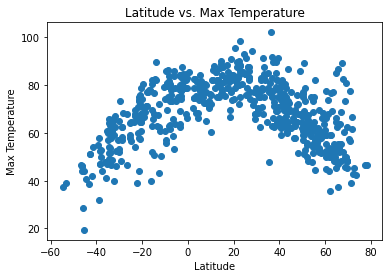

Analysis: Cities that are closer to 0 latitude tend to be hotter


In [26]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature")

plt.show()

print("Analysis: Cities that are closer to 0 latitude tend to be hotter")

## Latitude vs. Humidity Plot

Analysis: Cities closer to the equator (0 latitude) tend to be very humid. Cities north and south can vary when it comes to humidity


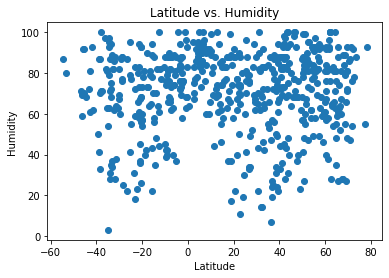

In [28]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

print("Analysis: Cities closer to the equator (0 latitude) tend to be very humid. Cities north and south can vary when it comes to humidity")

plt.show()

## Latitude vs. Cloudiness Plot

Analysis: Cities closer to the north and south poles tend to be less cloudy


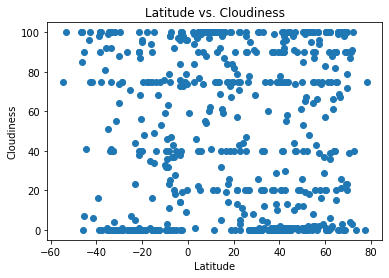

In [30]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")


print("Analysis: Cities closer to the north and south poles tend to be less cloudy")
          
          
plt.show()

## Latitude vs. Wind Speed Plot

Wind speed is generally slightly heavier in the Northern hemisphere


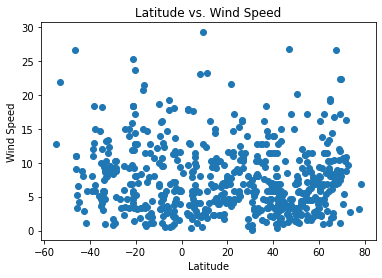

In [31]:
plt.scatter(weather_life_df['Lat'],weather_life_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

print("Wind speed is generally slightly heavier in the Northern hemisphere")          

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [32]:
# Create Northern and Southern Hemisphere DataFrames
nothern_hemis = weather_life_df.loc[weather_life_df["Lat"]>0]
nothern_hemis.reset_index(inplace=True)

southern_hemis = weather_life_df.loc[weather_life_df["Lat"]<0]
southern_hemis.reset_index(inplace=True)




# Latitudes
lat_graph_northern = nothern_hemis['Lat']
lat_graph_southern = southern_hemis['Lat']



# Max Temps
max_temp_graph_northern = nothern_hemis['Max Temp']
max_temp_graph_southern = southern_hemis['Max Temp']

(mt_slope, mt_int, mt_r, mt_p, mt_std_err) = stats.linregress(
    lat_graph_northern,max_temp_graph_northern)

(smt_slope, smt_int, smt_r, smt_p, smt_std_err) = stats.linregress(
    lat_graph_southern,max_temp_graph_southern)



# Humidities
hum_graph_northern = nothern_hemis['Humidity']
hum_graph_southern = southern_hemis['Humidity']


(nhu_slope, nhu_int, nhu_r, nhu_p, nhu_std_err) = stats.linregress(
    lat_graph_northern,hum_graph_northern)

(shu_slope, shu_int, shu_r, nhu_p, shu_std_err) = stats.linregress(
    lat_graph_southern,hum_graph_southern)


# Cloudiness
cloud_graph_northern = nothern_hemis['Cloudiness']
cloud_graph_southern = southern_hemis['Cloudiness']

(nclo_slope, nclo_int, nclo_r, nclo_p, nclo_std_err) = stats.linregress(
    lat_graph_northern,cloud_graph_northern)

(sclo_slope, sclo_int, sclo_r, sclo_p, sclo_std_err) = stats.linregress(
    lat_graph_southern,cloud_graph_southern)



# Wind Speeds
wind_speed_northern = nothern_hemis['Wind Speed']
wind_speed_southern = southern_hemis['Wind Speed']

(nws_slope, nws_int, nws_r, nws_p, nws_std_err) = stats.linregress(
    lat_graph_northern,wind_speed_northern)

(sws_slope, sws_int, sws_r, sws_p, sws_std_err) = stats.linregress(
    lat_graph_southern,wind_speed_southern)




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.43696809406091364
Analysis: There's a clear negative trend between latitude and max temp


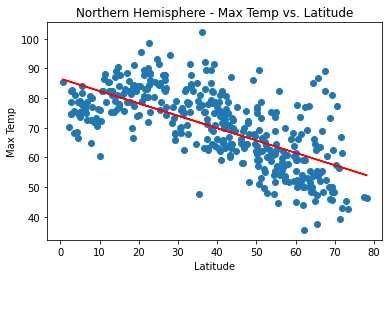

In [36]:
regress_values = lat_graph_northern * mt_slope + mt_int
line_eq = "y = " + str(round(mt_slope,2)) + "x + " + str(round(mt_int,2))

plt.scatter(lat_graph_northern,max_temp_graph_northern)

plt.plot(lat_graph_northern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")


print(f"R squared: {mt_r**2}")

print("Analysis: There's a clear negative trend between latitude and max temp")


plt.show()






####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5513222661694954
The more positive you get in latitude, the higher the temp will be


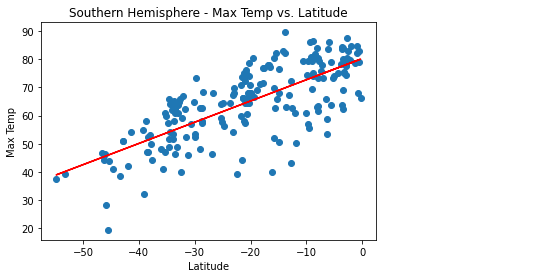

In [35]:
regress_values = lat_graph_southern * smt_slope + smt_int
line_eq = "y = " + str(round(smt_slope,2)) + "x + " + str(round(smt_int,2))

plt.scatter(lat_graph_southern,max_temp_graph_southern)

plt.plot(lat_graph_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")



print(f"R squared: {smt_r**2}")

print("The more positive you get in latitude, the higher the temp will be")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.005778389888184156
Cities in the northern hemisphere tend to be more humid


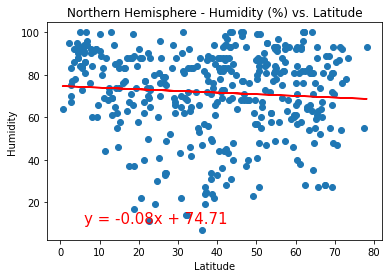

In [38]:
regress_values = lat_graph_northern * nhu_slope + nhu_int
line_eq = "y = " + str(round(nhu_slope,2)) + "x + " + str(round(nhu_int,2))

plt.scatter(lat_graph_northern,hum_graph_northern)

plt.plot(lat_graph_northern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")


print(f"R squared: {nhu_r**2}")

print("Cities in the northern hemisphere tend to be more humid")
          
          

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.009062335305281999
Southern hemisphere cities' datapoints aren't as condensed where it's more humid


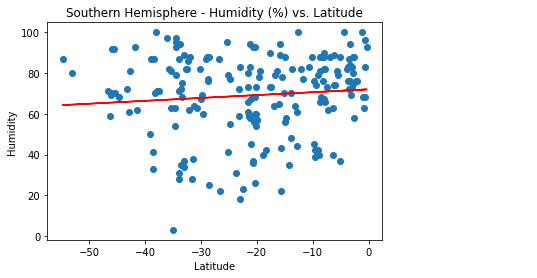

In [39]:

regress_values = lat_graph_southern * shu_slope + shu_int
line_eq = "y = " + str(round(shu_slope,2)) + "x + " + str(round(shu_int,2))

plt.scatter(lat_graph_southern,hum_graph_southern)

plt.plot(lat_graph_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")


print(f"R squared: {shu_r**2}")
print("Southern hemisphere cities' datapoints aren't as condensed where it's more humid")



plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.016059262321494235
Cloudiness decreases slightly the more north the cities are


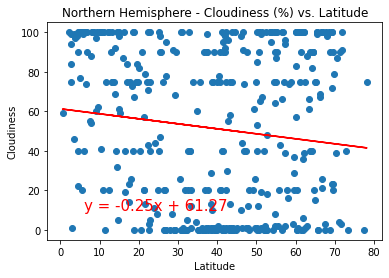

In [42]:
regress_values = lat_graph_northern * nclo_slope + nclo_int
line_eq = "y = " + str(round(nclo_slope,2)) + "x + " + str(round(nclo_int,2))

plt.scatter(lat_graph_northern,cloud_graph_northern)

plt.plot(lat_graph_northern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")


print(f"R squared: {nclo_r**2}")
print("Cloudiness decreases slightly the more north the cities are")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0003346329272343851
Cities get slightly cloudier the more south you go


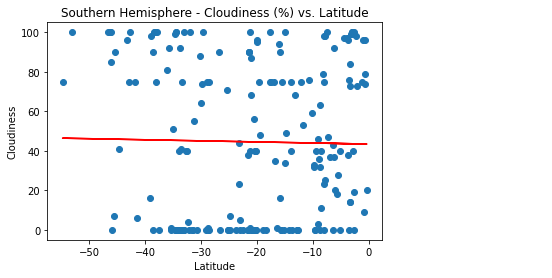

In [43]:
regress_values = lat_graph_southern * sclo_slope + sclo_int
line_eq = "y = " + str(round(sclo_slope,2)) + "x + " + str(round(sclo_int,2))

plt.scatter(lat_graph_southern,cloud_graph_southern)

plt.plot(lat_graph_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")


print(f"R squared: {sclo_r**2}")
print("Cities get slightly cloudier the more south you go")


plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0003487008790355181
Wind speed is pretty consistent among cities in the northern hemisphere


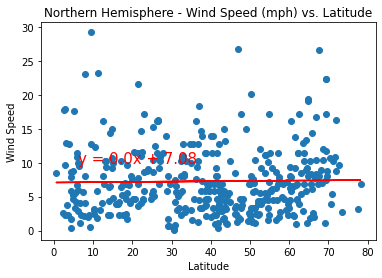

In [44]:
regress_values = lat_graph_northern * nws_slope + nws_int
line_eq = "y = " + str(round(nws_slope,2)) + "x + " + str(round(nws_int,2))

plt.scatter(lat_graph_northern,wind_speed_northern)

plt.plot(lat_graph_northern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")


print(f"R squared: {nws_r**2}")
print("Wind speed is pretty consistent among cities in the northern hemisphere")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.02064217034674719
Wind speed slightly increases the more south you go


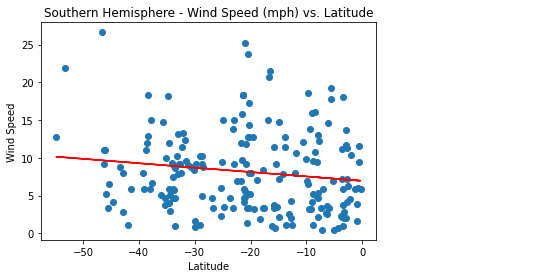

In [45]:
regress_values = lat_graph_southern * sws_slope + sws_int
line_eq = "y = " + str(round(sws_slope,2)) + "x + " + str(round(sws_int,2))

plt.scatter(lat_graph_southern,wind_speed_southern)

plt.plot(lat_graph_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")


print(f"R squared: {sws_r**2}")
print("Wind speed slightly increases the more south you go")


plt.show()

# Observations
* Cities across the globe will show a significant amount of humidity in the air, however there a very good chance that cities closer to the equator will be very humid
* In terms of Max Temperature, cities closer to the equator will almost always be very hot.
* Cities in the norhern hemisphere tend to be very similar in terms of humidity